### Import Libraries

In [35]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load the MNIST Dataset

In [36]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

### Explore the Data

In [37]:
print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))
print("Shape: ", X_train.shape)

Training samples:  60000
Testing samples:  10000
Shape:  (60000, 28, 28)


5


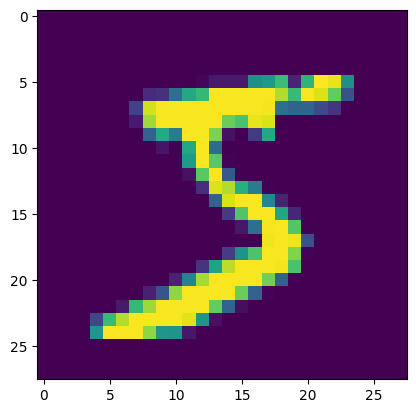

In [38]:
plt.imshow(X_train[0])
print(Y_train[0])

### Normalize the Data

In [39]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build the CNN Model

In [40]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compile the Model

In [41]:
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Train the Model

In [43]:
model.fit(X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9562 - loss: 0.1464 - val_accuracy: 0.9858 - val_loss: 0.0444
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9852 - loss: 0.0474 - val_accuracy: 0.9906 - val_loss: 0.0282
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9910 - loss: 0.0308 - val_accuracy: 0.9844 - val_loss: 0.0464
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9929 - loss: 0.0236 - val_accuracy: 0.9927 - val_loss: 0.0251
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9922 - val_loss: 0.0290
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9913 - val_loss: 0.0304
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.9907 - val_loss: 0.0336
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9965 -

### Evaluate the Model

In [44]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9885 - loss: 0.0497
Test accuracy: 99.10%


### Make Predictions

In [46]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(10000,)

### Visualize Predictions

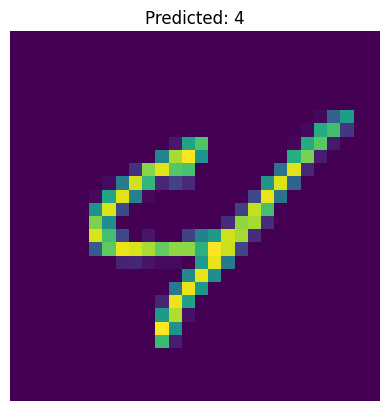

In [47]:
index = 420
plt.imshow(X_test[index])
plt.title(f"Predicted: {predicted_labels[index]}")
plt.axis('off')
plt.show()